In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import wandb
import torchvision

sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '../'))

# from symlie.misc.utils_results import get_and_check_Ps
# from symlie.misc.wandb import update_results_df, get_inspect_df
# from symlie.model.setup import load_P_pred
# from symlie.model.networks.linear import LinearP
# from symlie.model.networks.implicit import LinearImplicit
# from symlie.misc.viz import plot2d

from symlie.model.networks.mlp import CombiMLP
from symlie.model.learner import CombiLearner
from symlie.run import parse_options, main, process_args

In [2]:
args = parse_options(notebook=True)

args.seed = 1
args.tags = ['dev']
args.batch_size = 16
args.max_epochs = 100

args.data_dir = '../data/sine1d'
args.y_low = 1
args.y_high = 3
args.noise_std = 0.5
args.grid_size = (1, 7)
args.eps_mult = [0.0, 0.0, 1.0, 0.0]

args.net = 'CombiTrain'
args.implicit_layer_dims = [[49, 49, 49, 49], [7, 7, 7]]
args.vanilla_layer_dims  = [7, 7, 1]
# args.grid_sizes = [(1,7), {'a': (1,1), 'b': (1,7)}]
args.grid_sizes = [[[1,7], [1,7]], [[1,1], [1,7]]]

args.n_train = 1000
args.lr = 0.001
args.max_epochs = 20

args.criterion = 'mses'
args.lossweight_y = 1.0
args.lossweight_o = 1.0

# args.do_return = True
args.logger = None


process_args(args)

# Training
model, trainer, datamodule = main(args)

# _, trainer, datamodule = main(args)

Seed set to 1
/Users/elias/anaconda3/envs/sympde/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Running without logging
Print parameters in configure_optimizers
net.layers.0.1.0.weight True
net.layers.0.1.0.bias True
net.layers.0.1.3.weight True
net.layers.0.1.3.bias True
net.layers.0.1.6.weight True
net.layers.0.1.6.bias True
net.layers.1.1.0.weight True
net.layers.1.1.0.bias True
net.layers.1.1.3.weight True
net.layers.1.1.3.bias True
net.weights.0 True
net.weights.1 True

Testing DataLoader 0: 100%|██████████| 63/63 [00:00<00:00, 240.52it/s]


Error: You must call wandb.init() before wandb.log()

In [3]:
# x, y, _ = batch = next(iter(datamodule.train_dataloader()))

In [4]:
# net = CombiMLP(
#     implicit_layer_dims=[[0], [0]],
#     vanilla_layer_dims=[7, 7, 1],
#     bias = False
# )

# weight1, weight2 = net.weights[0].data.detach().clone(), net.weights[1].data.detach().clone()

# model = CombiLearner(
#     net = net,
#     criterion = [(args.lossweight_y, nn.MSELoss())], #+ [(args.lossweight_o, nn.MSELoss()) for _ in range(len(args.grid_sizes))],
#     lr = args.lr,
#     grid_sizes=args.grid_sizes,
#     transform_kwargs=args.transform_kwargs,
# )

# out = net(x)

# _, trainer, datamodule = main(args)
# trainer.fit(model, datamodule)

    

In [5]:
# net_vanilla = torchvision.ops.MLP(
#     in_channels=7,
#     hidden_channels=[7, 1],
#     bias=False
# )

# net_vanilla[0].weight.data = weight1
# net_vanilla[3].weight.data = weight2

# out_vanilla = net_vanilla(x)


# model = CombiLearner(
#     net = net_vanilla,
#     criterion = [(args.lossweight_y, nn.MSELoss())], #+ [(args.lossweight_o, nn.MSELoss()) for _ in range(len(args.grid_sizes))],
#     lr = args.lr,
#     grid_sizes=args.grid_sizes,
#     transform_kwargs=args.transform_kwargs,
# )

# _, trainer, datamodule = main(args)
# trainer.fit(model, datamodule)

# torch.allclose(out, out_vanilla)


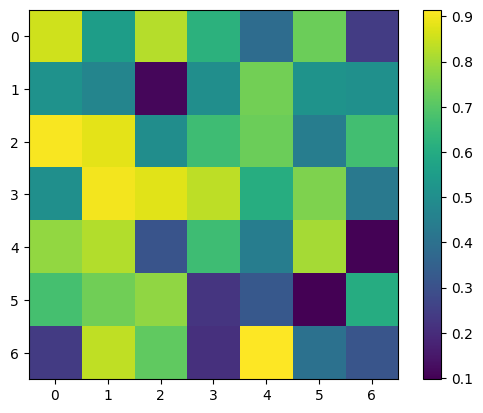

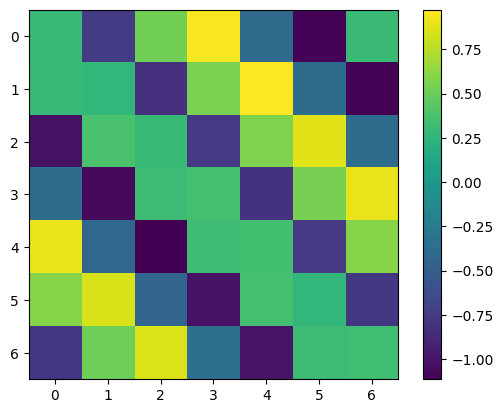

In [6]:
w = torch.rand_like(model.net.weights[0])
plt.imshow( w )
plt.colorbar()
plt.show()

plt.imshow( model.net.layers[0].forward(w).detach() )
plt.colorbar()
plt.show()